In [3]:
#3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#4
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df.head())
print(gdp_df.tail())

#there are NaN values represted as simply "" in the text file.

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2023  1992.424394              NaN
1     Afghanistan  2022  1981.710168              NaN
2     Afghanistan  2021  2144.166570              NaN
3     Afghanistan  2020  2769.685745              NaN
4     Afghanistan  2019  2927.245144              NaN
     Country or Area  Year        Value  Value Footnotes
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN


In [11]:
#5
print("Shape of gdp_df:", gdp_df.shape)
print(gdp_df.info())

#8219 rows and 4 columns

Shape of gdp_df: (8219, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB
None


In [44]:
#6
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2023     1992.424394
1  Afghanistan  2022     1981.710168
2  Afghanistan  2021     2144.166570
3  Afghanistan  2020     2769.685745
4  Afghanistan  2019     2927.245144


In [193]:
#7
country_counts = gdp_df['Country'].value_counts()
missing_data_countries = country_counts[country_counts < gdp_df['Year'].nunique()]
print("Missing:\n", missing_data_countries)

Missing:
 Country
Bhutan                       33
Syrian Arab Republic         33
Somalia                      33
Tonga                        33
Lebanon                      33
Greenland                    32
West Bank and Gaza           30
Serbia                       29
Montenegro                   27
San Marino                   26
CuraÃ§ao                     24
Afghanistan                  24
Virgin Islands               21
Cayman Islands               18
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, dtype: int64


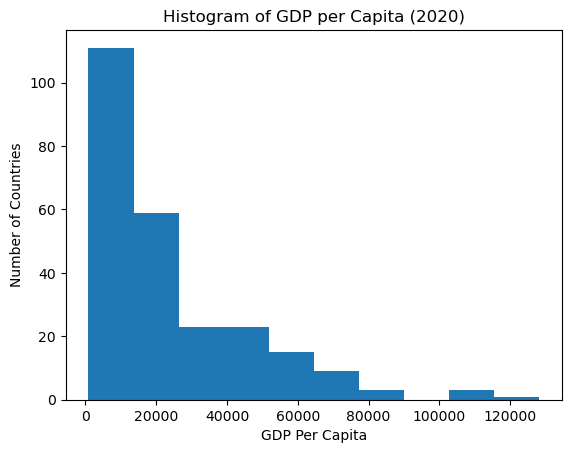

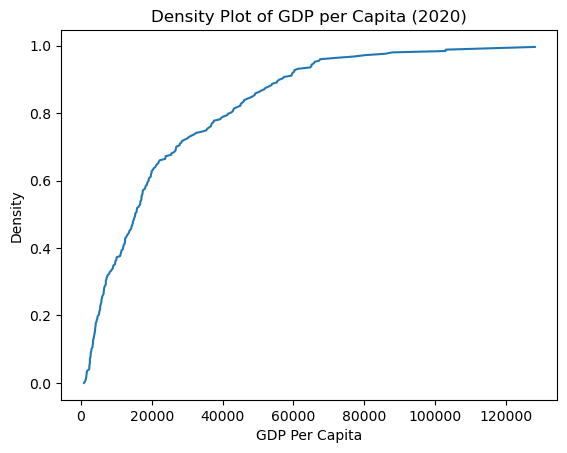

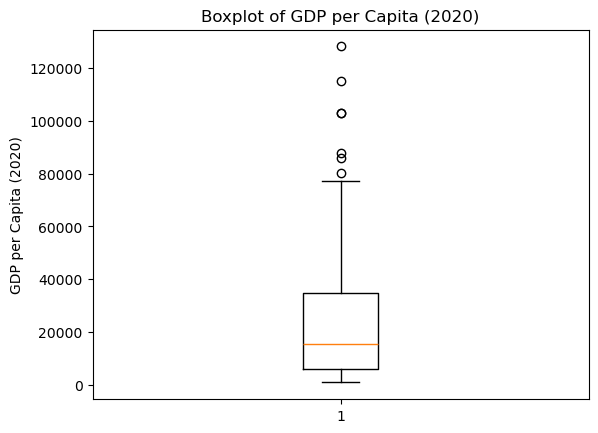

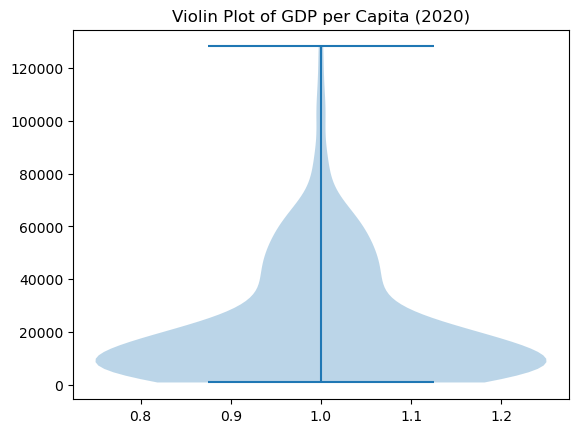

In [209]:
#8
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
gdp_values = gdp_2020['GDP_Per_Capita']

#histogram
plt.hist(gdp_values)
plt.title("Histogram of GDP per Capita (2020)")
plt.xlabel("GDP Per Capita")
plt.ylabel("Number of Countries")
plt.show()

#density plot
plt.plot(sorted(gdp_values), [i / len(gdp_values) for i in range(len(gdp_values))])
plt.title("Density Plot of GDP per Capita (2020)")
plt.xlabel("GDP Per Capita")
plt.ylabel("Density")
plt.show()

#boxplot
plt.boxplot(gdp_values)
plt.title("Boxplot of GDP per Capita (2020)")
plt.ylabel("GDP per Capita (2020)")
plt.show()

#violin plot
plt.violinplot(gdp_values)
plt.title("Violin Plot of GDP per Capita (2020)")
plt.show()


In [211]:
#9
gdp_2020 = gdp_df[gdp_df["Year"] == 2020]
median_gdp_2020 = gdp_2020['GDP_Per_Capita'].median()
print(median_gdp_2020)


15309.23598817024


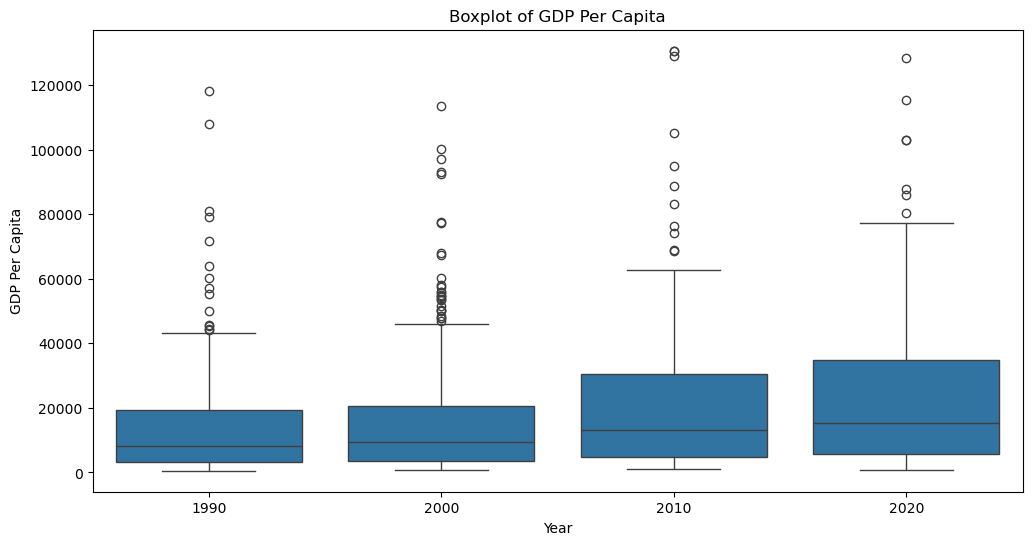

In [54]:
#10
gdp_decades = gdp_df[gdp_df["Year"].isin([1990, 2000, 2010, 2020])]
plt.figure(figsize=(12, 6))
sns.boxplot(x="Year", y="GDP_Per_Capita", data=gdp_decades)
plt.title("Boxplot of GDP Per Capita")
plt.ylabel("GDP Per Capita")
plt.show()

In [58]:
#11
high_gdp = gdp_df[gdp_df["GDP_Per_Capita"] > 100000]
first_high_gdp = high_gdp.sort_values(by="Year").iloc[0]
first_high_gdp[['Country', 'Year', 'GDP_Per_Capita']]

Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           108057.042464
Name: 7827, dtype: object

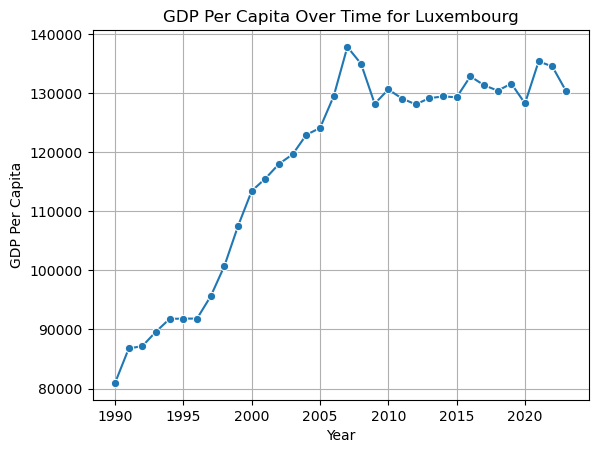

In [108]:
#12
gdp_2020 = gdp_df[gdp_df["Year"] == 2020]
highest_gdp_country = gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmax(), "Country"]
gdp_highest_country = gdp_df[gdp_df["Country"] == highest_gdp_country]

sns.lineplot(data=gdp_highest_country, x="Year", y="GDP_Per_Capita", marker="o")
plt.title(f"GDP Per Capita Over Time for {highest_gdp_country}")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.grid(True)
plt.show()

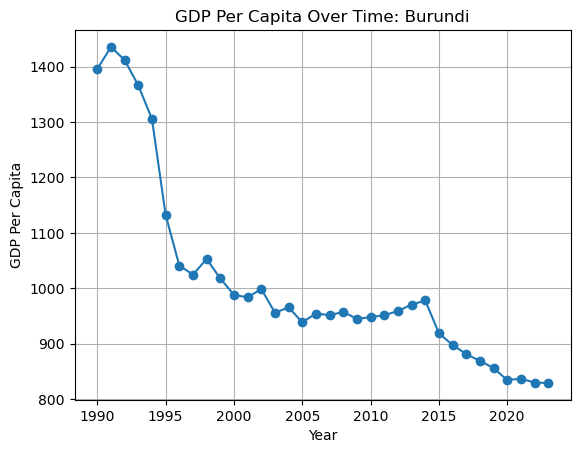

In [110]:
#13
gdp_2020 = gdp_df[gdp_df["Year"] == 2020]
gdp_lowest = gdp_df[gdp_df["Country"] == lowest_gdp_country]
lowest_gdp_country = gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmin(), "Country"]
plt.plot(gdp_lowest["Year"], gdp_lowest["GDP_Per_Capita"], marker="o")
plt.title(f"GDP Per Capita Over Time: {lowest_gdp_country}")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.grid(True)
plt.show()

In [118]:
#14
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines='skip')
print(internet_df.head())
print(internet_df.tail())
print(internet_df.dtypes)

  Country or Area  Year  Value Value Footnotes
0     Afghanistan  2019  17.60               1
1     Afghanistan  2018  16.80               2
2     Afghanistan  2017  13.50               3
3     Afghanistan  2016  11.00               4
4     Afghanistan  2015   8.26               4
     Country or Area                                               Year  \
6375             293  Estimated based on Survey's results. Populatio...   
6376             294                     Preliminary. Country estimate.   
6377             295                                 18+. ITU estimate.   
6378             296                     ICT survey. Population age 11+   
6379             297  Internet users aged 3 years and above who used...   

      Value Value Footnotes  
6375    NaN             NaN  
6376    NaN             NaN  
6377    NaN             NaN  
6378    NaN             NaN  
6379    NaN             NaN  
Country or Area     object
Year                object
Value              float64
Value 

In [154]:
#15
internet_df = internet_df.drop(columns=["Value Footnotes"])
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
print(internet_df.head())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2019               17.60
1  Afghanistan  2018               16.80
2  Afghanistan  2017               13.50
3  Afghanistan  2016               11.00
4  Afghanistan  2015                8.26


In [164]:
#17
first_non_zero_year = internet_df[internet_df["Internet_Users_Pct"] > 0]["Year"].min()
print({first_non_zero_year})

{'1990'}


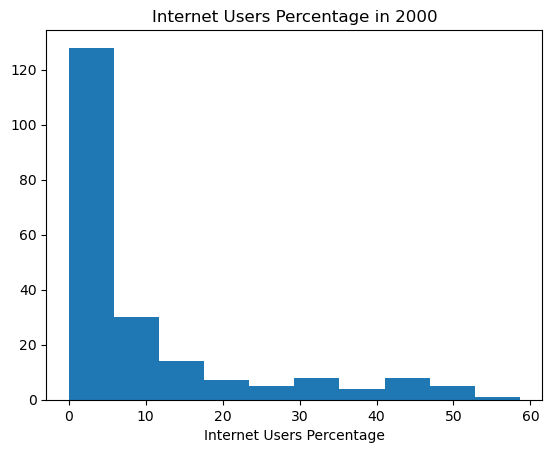

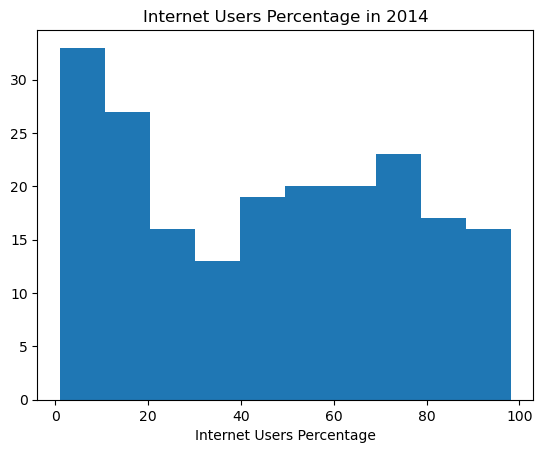

In [215]:
#18
internet_2000 = internet_df[internet_df["Year"] == 2000]["Internet_Users_Pct"]
internet_2014 = internet_df[internet_df["Year"] == 2014]["Internet_Users_Pct"]

plt.hist(internet_2000)
plt.title("Internet Users Percentage in 2000")
plt.xlabel("Internet Users Percentage")
plt.show()

plt.hist(internet_2014)
plt.title("Internet Users Percentage in 2014")
plt.xlabel("Internet Users Percentage")
plt.show()